# 특강 과제물 - 국가 연도별 기대수명 예측 모델
- LifeExpectancy dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.데이터 준비

In [2]:
!wget https://raw.githubusercontent.com/good-thing/life_exam/main/LifeExpectancy1.csv

--2023-07-27 13:09:04--  https://raw.githubusercontent.com/good-thing/life_exam/main/LifeExpectancy1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 333418 (326K) [text/plain]
Saving to: ‘LifeExpectancy1.csv’

LifeExpectancy1.csv 100%[===================>] 325.60K  --.-KB/s    in 0.03s   

2023-07-27 13:09:04 (9.63 MB/s) - ‘LifeExpectancy1.csv’ saved [333418/333418]



In [3]:
df=pd.read_csv('/content/LifeExpectancy1.csv')

In [4]:
df

,Country,Year,Status,LifeExpectancy,AdultMortality,InfantDeaths,Alcohol,PercentageExpenditure,HepatitisB,Measles,...,Polio,TotalExpenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness1-19Years,Thinness5-9Years,IncomeCompositionOfResources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


## 2.데이터 탐색

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2938 non-null   object 
 1   Year                          2938 non-null   int64  
 2   Status                        2938 non-null   object 
 3   LifeExpectancy                2928 non-null   float64
 4   AdultMortality                2928 non-null   float64
 5   InfantDeaths                  2938 non-null   int64  
 6   Alcohol                       2744 non-null   float64
 7   PercentageExpenditure         2938 non-null   float64
 8   HepatitisB                    2385 non-null   float64
 9   Measles                       2938 non-null   int64  
 10  BMI                           2904 non-null   float64
 11  Under-fiveDeaths              2938 non-null   int64  
 12  Polio                         2919 non-null   float64
 13  Tot

<Axes: >

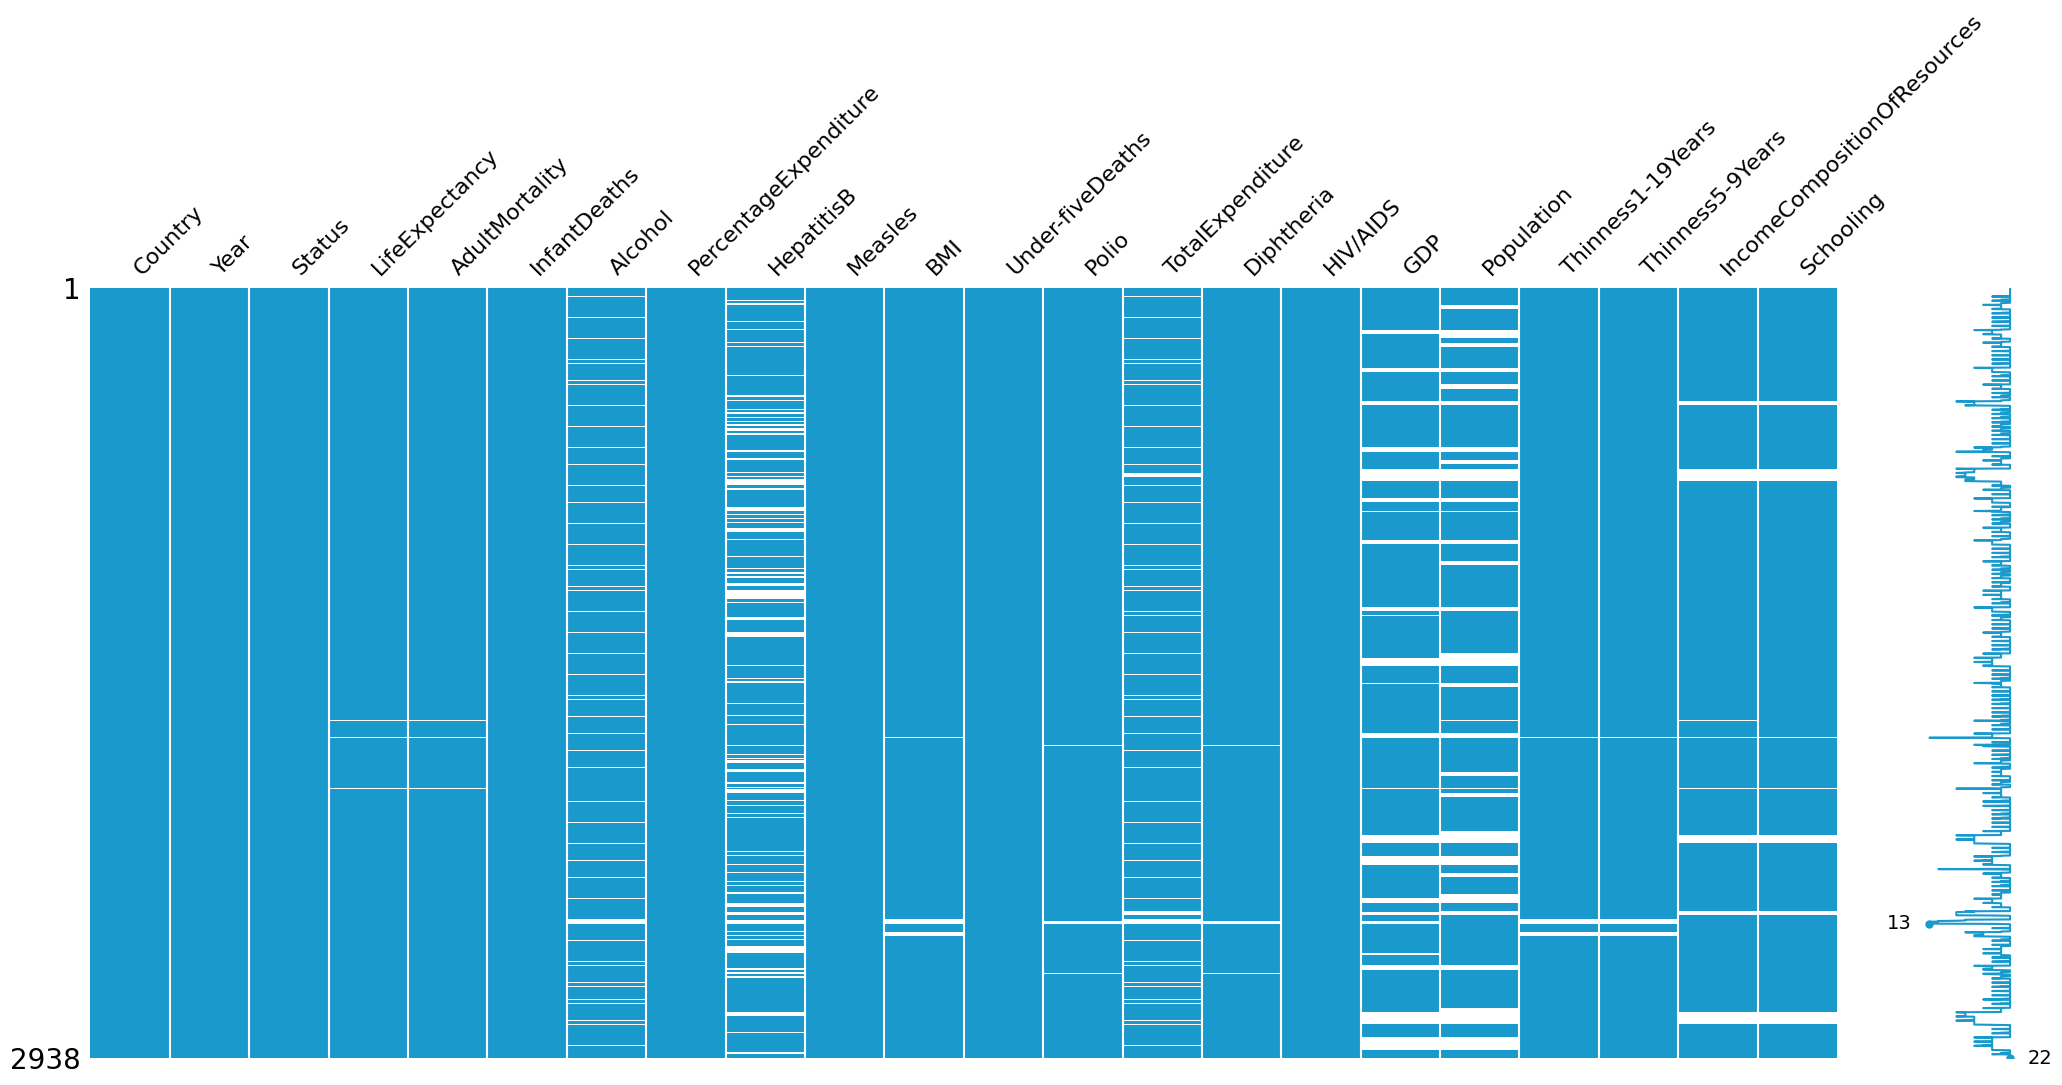

In [6]:
# 결측치 시각화
import missingno as msno
msno.matrix(df, color=(0.1, 0.6, 0.8))

<Axes: >

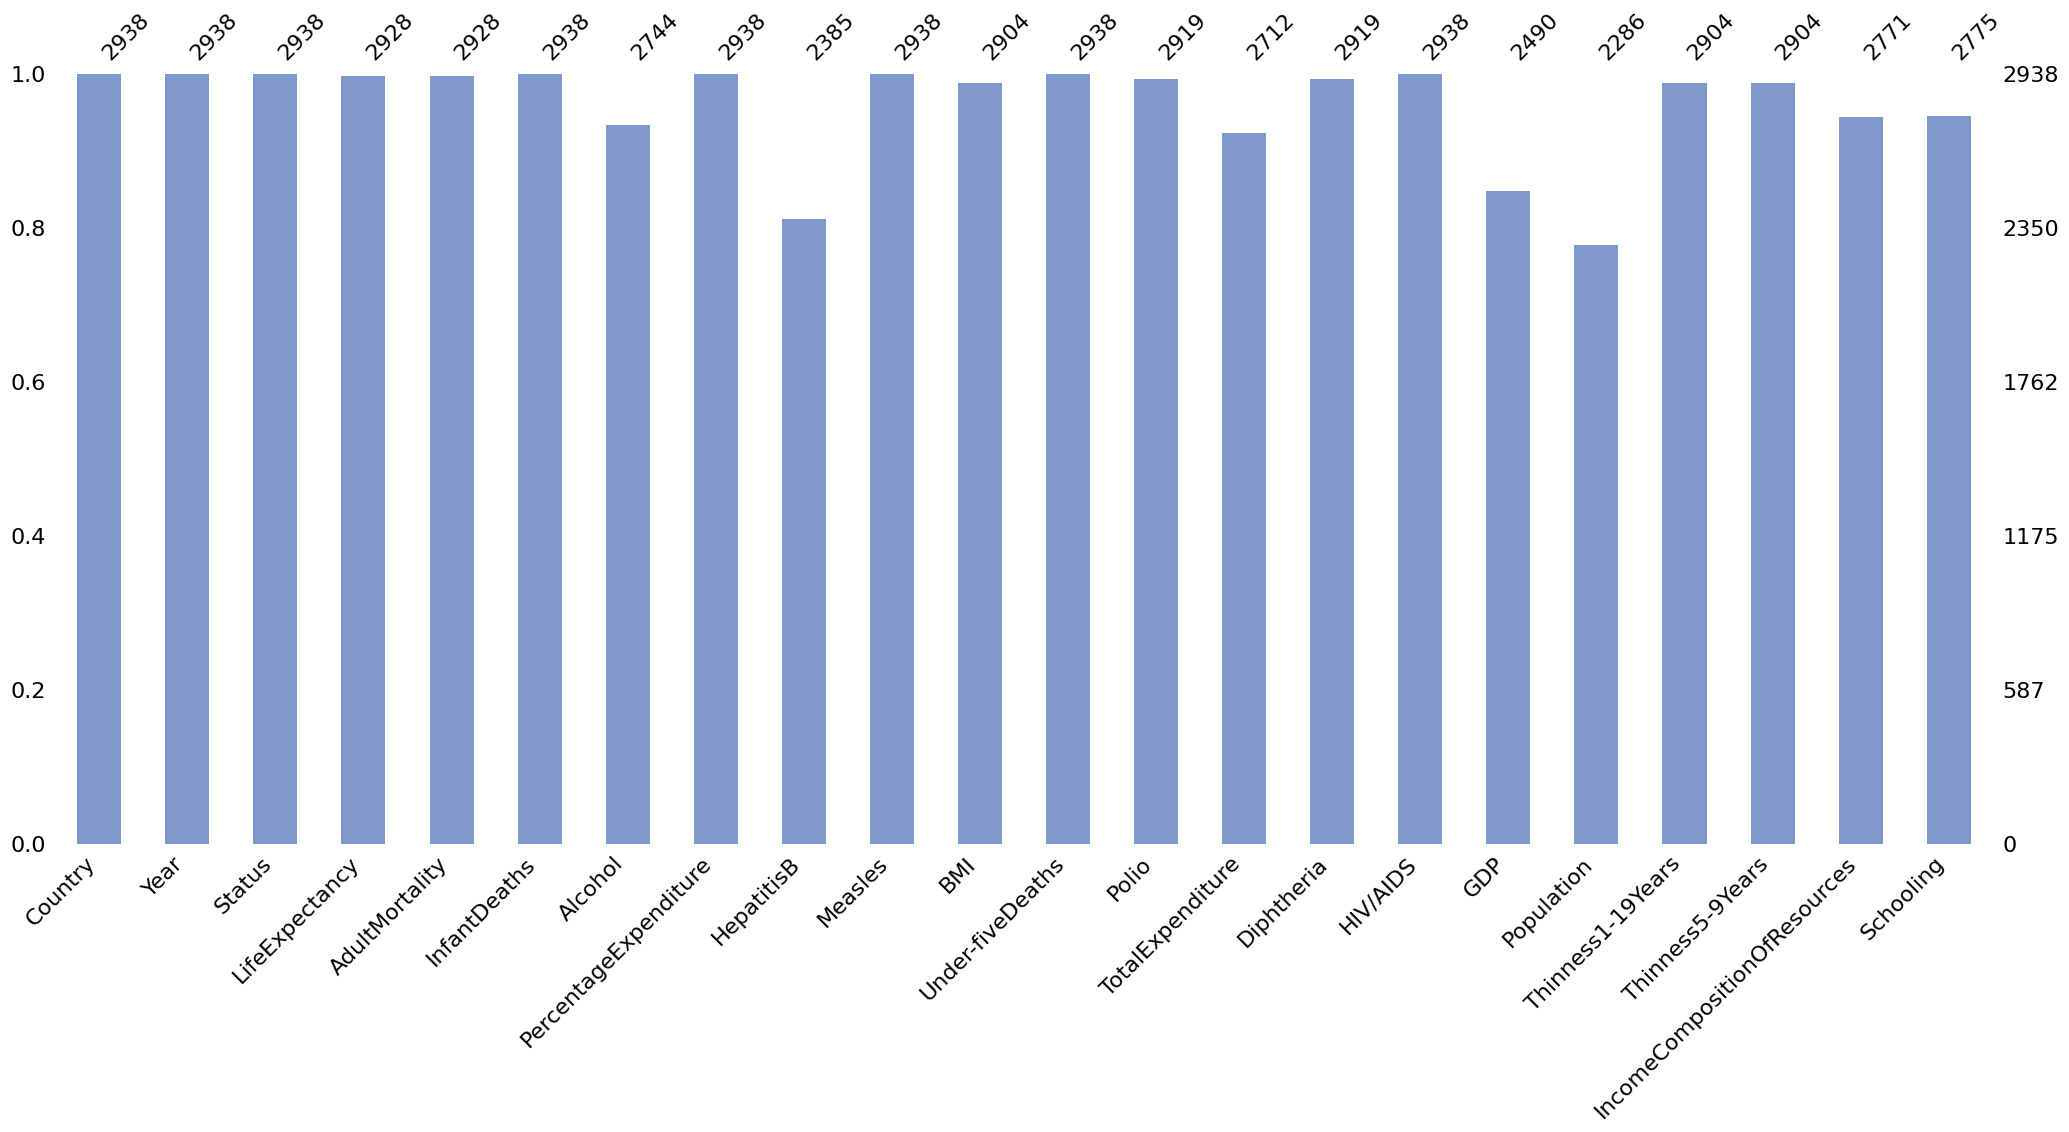

In [7]:
# 결측치 갯수 수치화
msno.bar(df, color=(0.5, 0.6, 0.8))

In [8]:
df.isna().sum(axis=0)        #  중앙값이랑 평균치로 결측값 대체 하기로 함

Country                           0
Year                              0
Status                            0
LifeExpectancy                   10
AdultMortality                   10
InfantDeaths                      0
Alcohol                         194
PercentageExpenditure             0
HepatitisB                      553
Measles                           0
BMI                              34
Under-fiveDeaths                  0
Polio                            19
TotalExpenditure                226
Diphtheria                       19
HIV/AIDS                          0
GDP                             448
Population                      652
Thinness1-19Years                34
Thinness5-9Years                 34
IncomeCompositionOfResources    167
Schooling                       163
dtype: int64

## 3.데이터 전처리

#### 결측치 처리

In [9]:
df.columns        # 중앙값으로 대체할 컬럼

Index(['Country', 'Year', 'Status', 'LifeExpectancy', 'AdultMortality',
       'InfantDeaths', 'Alcohol', 'PercentageExpenditure', 'HepatitisB',
       'Measles', 'BMI', 'Under-fiveDeaths', 'Polio', 'TotalExpenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness1-19Years',
       'Thinness5-9Years', 'IncomeCompositionOfResources', 'Schooling'],
      dtype='object')

In [10]:
cols=['AdultMortality','PercentageExpenditure','HepatitisB','Polio','Diphtheria','GDP',
      'Population','Thinness1-19Years','Thinness5-9Years']

In [11]:
for col in cols:
    median_value=df[col].median()
    df[col]=df[col].fillna(median_value)

In [12]:
df=df.fillna(df.mean())          #남은 나머지 결측값 평균값으로 대체

<ipython-input-12-35fc04c44e74>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(df.mean())          #남은 나머지 결측값 평균값으로 대체


In [13]:
# 이상치 찾기(나라당 디폴트값이 16개인지 확인, 그 이하는 이상치 취급)
df['Country'].value_counts().loc[lambda x:x<15]

Tuvalu                   1
Cook Islands             1
Marshall Islands         1
Monaco                   1
Palau                    1
Niue                     1
San Marino               1
Nauru                    1
Saint Kitts and Nevis    1
Dominica                 1
Name: Country, dtype: int64

In [14]:
co = ['Tuvalu', 'Cook Islands', 'Marshall Islands', 'Marshall Islands', 'Monaco', 'Palau',
      'Niue', 'San Marino', 'Nauru', 'Saint Kitts and Nevis', 'Dominica']

In [15]:
# 이상치로 분류된 국가 제거
for c in co:
    df = df.drop(df[df['Country']==c].index)

In [16]:
# 제거확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2928 non-null   object 
 1   Year                          2928 non-null   int64  
 2   Status                        2928 non-null   object 
 3   LifeExpectancy                2928 non-null   float64
 4   AdultMortality                2928 non-null   float64
 5   InfantDeaths                  2928 non-null   int64  
 6   Alcohol                       2928 non-null   float64
 7   PercentageExpenditure         2928 non-null   float64
 8   HepatitisB                    2928 non-null   float64
 9   Measles                       2928 non-null   int64  
 10  BMI                           2928 non-null   float64
 11  Under-fiveDeaths              2928 non-null   int64  
 12  Polio                         2928 non-null   float64
 13  Tot

<Axes: >

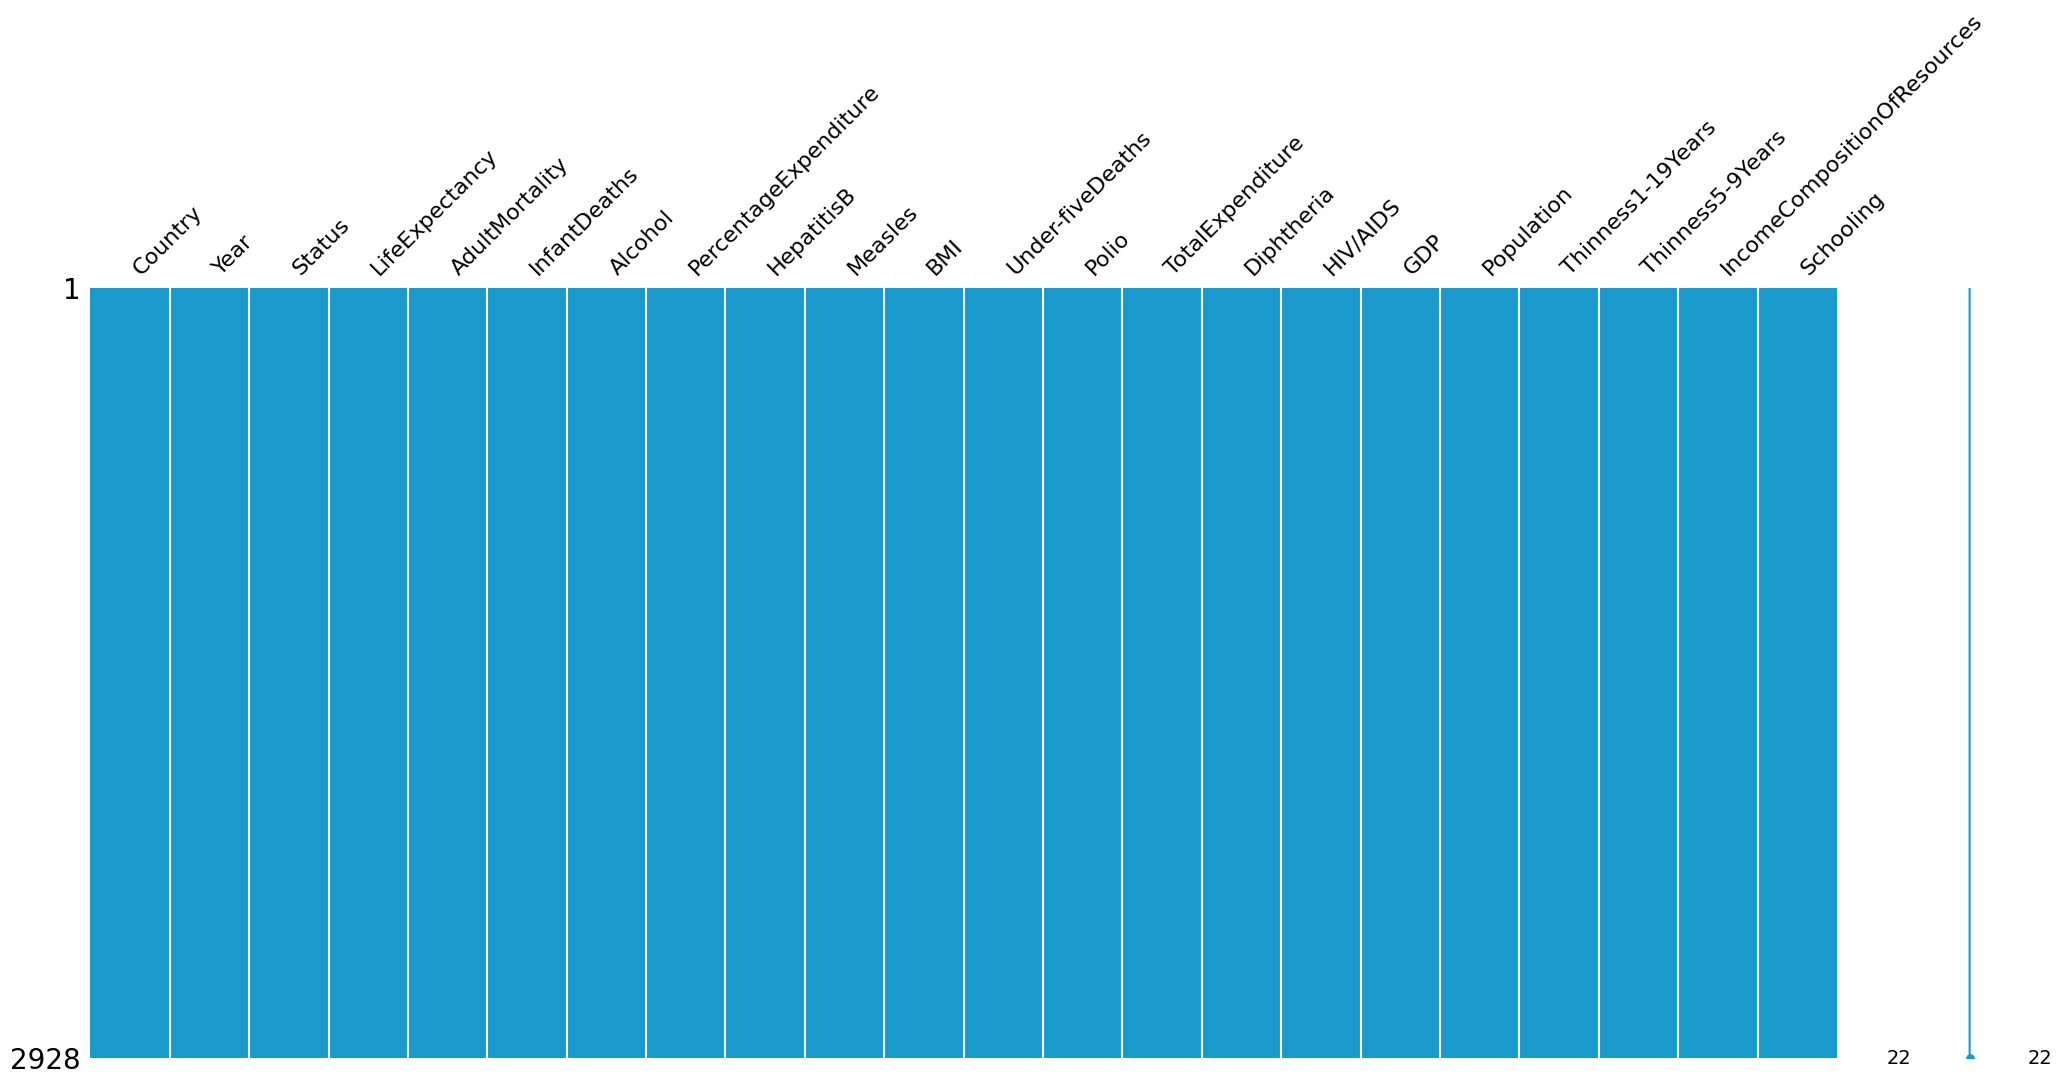

In [17]:
msno.matrix(df, color=(0.1, 0.6, 0.8))

In [18]:
df['LifeExpectancy'].value_counts()

73.0    45
75.0    33
78.0    31
73.6    28
73.9    25
        ..
43.1     1
49.5     1
49.0     1
55.1     1
45.4     1
Name: LifeExpectancy, Length: 362, dtype: int64

In [19]:
type(df)

pandas.core.frame.DataFrame

#### 유사한 컬럼 삭제

<ipython-input-20-271814aefd3b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
<ipython-input-20-271814aefd3b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="Greens")


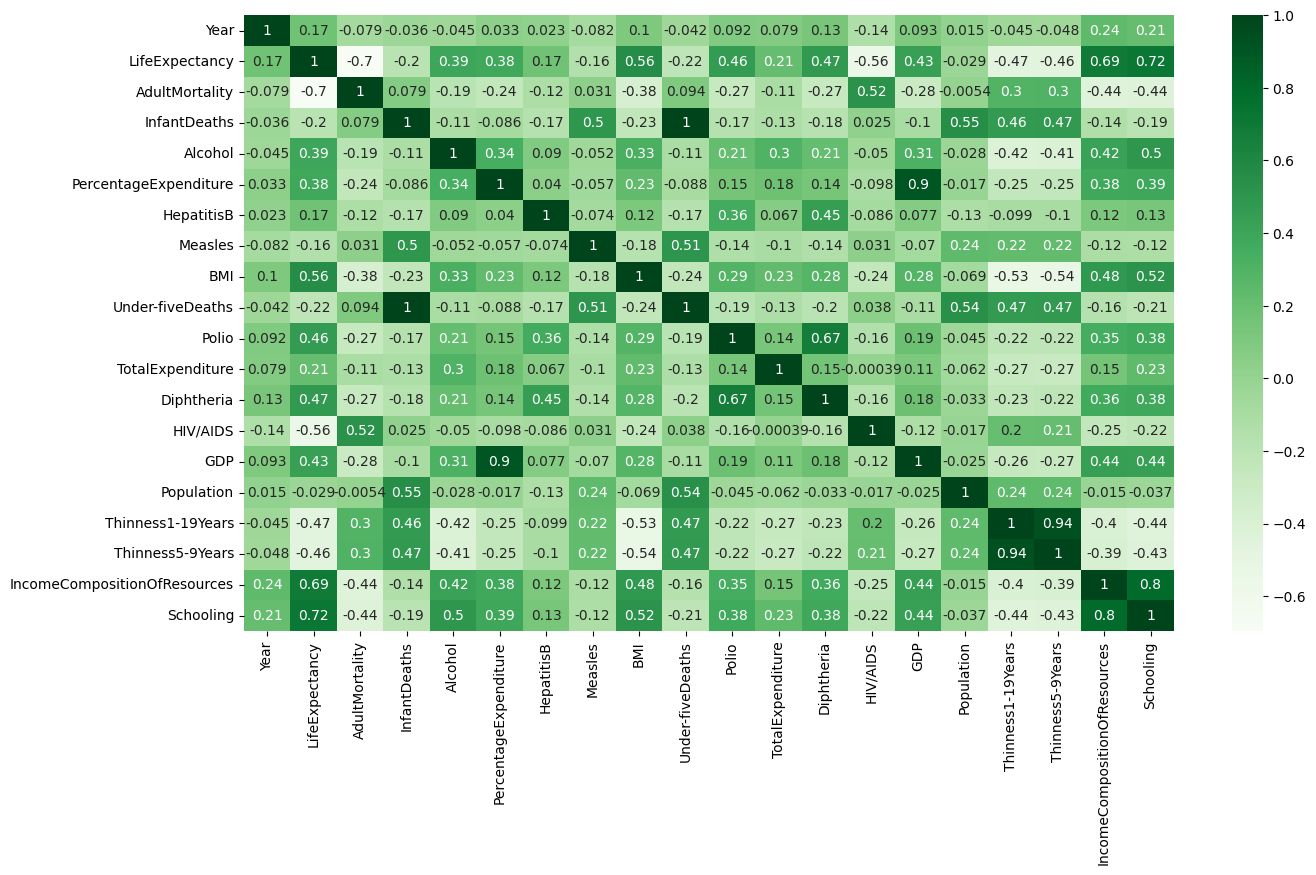

In [20]:
df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap="Greens")
plt.show()                                  #0.75 이상인 값 지우기
#under-fiveDeaths,percentageExpenditure,IncomeCompositionOfResources,Thinness5-9years

In [21]:
# 값 지우기
colss =['Under-fiveDeaths','PercentageExpenditure','IncomeCompositionOfResources','Thinness5-9Years']

In [22]:
for col in colss:
    df=df.drop(col,axis=1)

<Axes: >

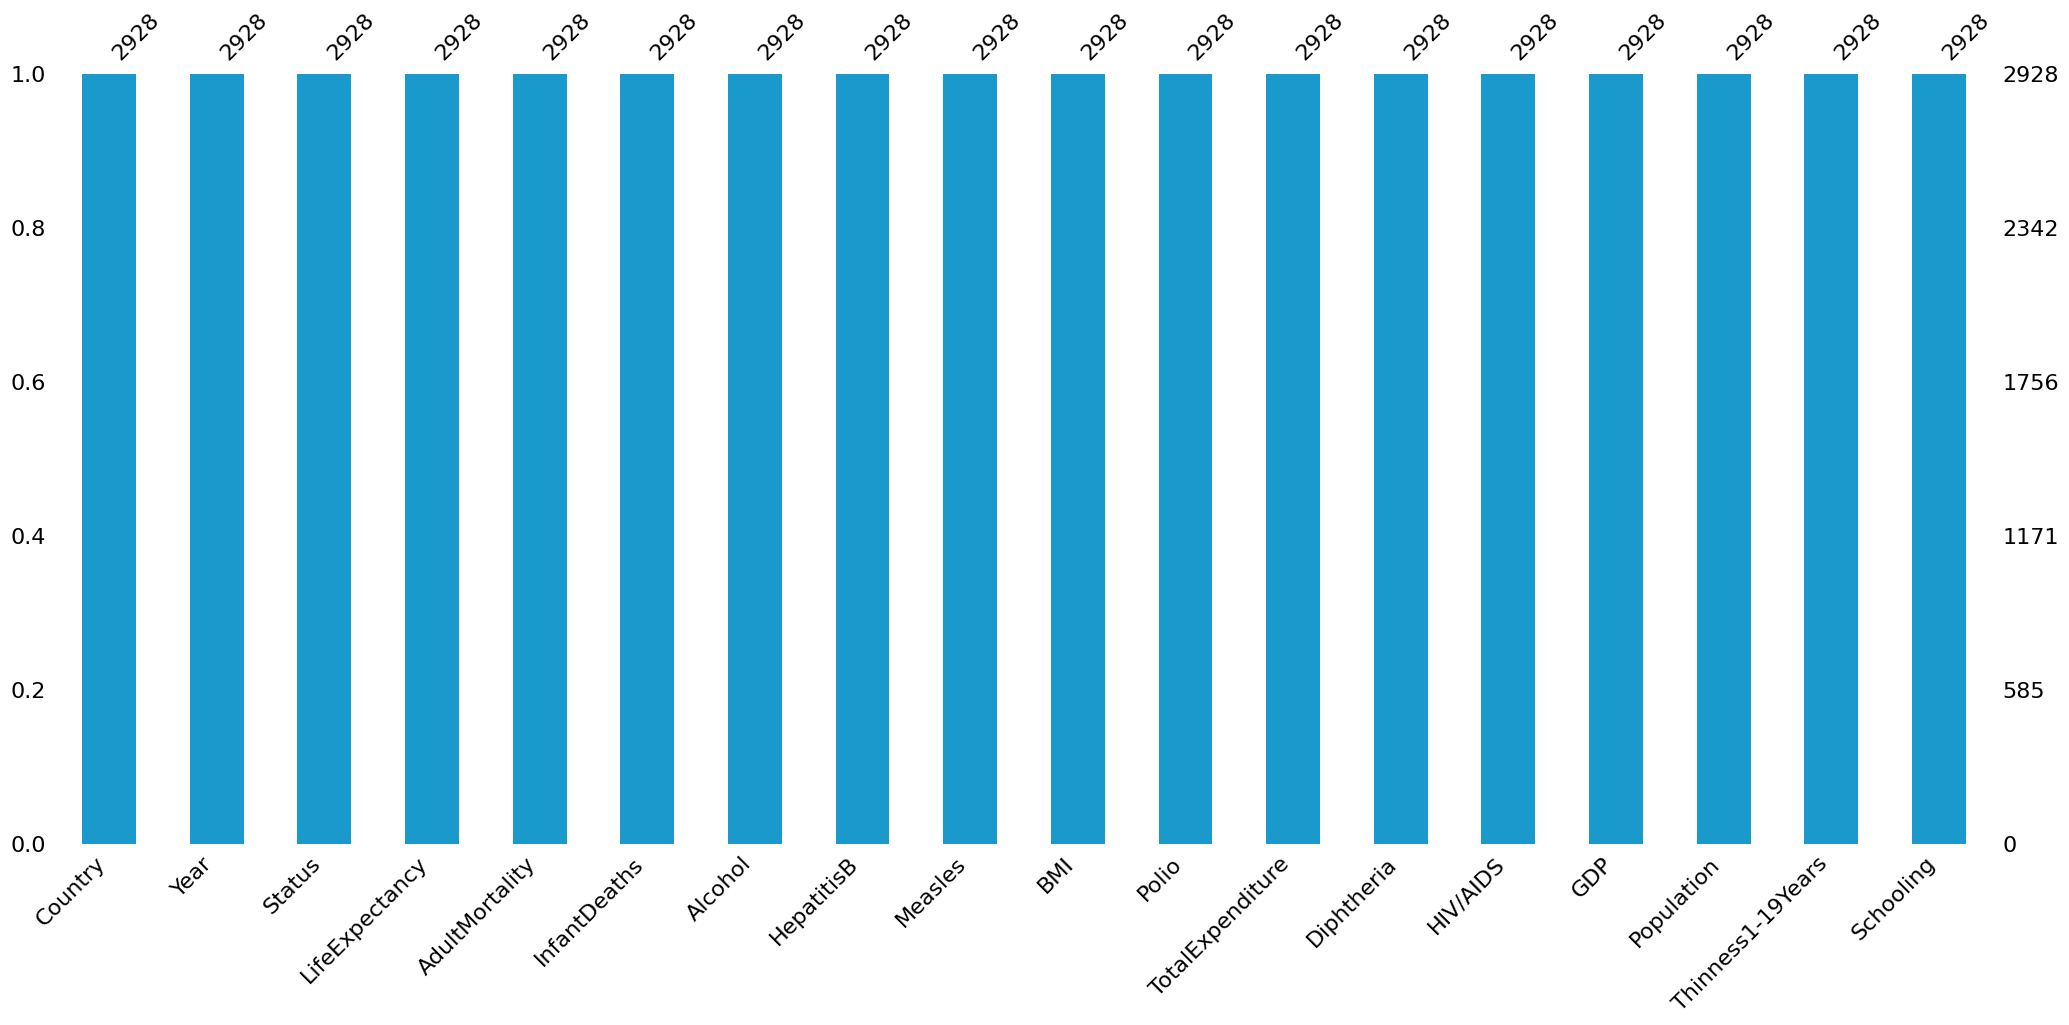

In [23]:
# 제거 확인
import missingno as msno
msno.bar(df, color=(0.1, 0.6, 0.8))

## 4.테스트데이터 분리

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            2928 non-null   object 
 1   Year               2928 non-null   int64  
 2   Status             2928 non-null   object 
 3   LifeExpectancy     2928 non-null   float64
 4   AdultMortality     2928 non-null   float64
 5   InfantDeaths       2928 non-null   int64  
 6   Alcohol            2928 non-null   float64
 7   HepatitisB         2928 non-null   float64
 8   Measles            2928 non-null   int64  
 9   BMI                2928 non-null   float64
 10  Polio              2928 non-null   float64
 11  TotalExpenditure   2928 non-null   float64
 12  Diphtheria         2928 non-null   float64
 13  HIV/AIDS           2928 non-null   float64
 14  GDP                2928 non-null   float64
 15  Population         2928 non-null   float64
 16  Thinness1-19Years  2928 

In [25]:
# 2011~2015 test 데이터로 설정
years = [2011,2012, 2013, 2014, 2015]
test = df[df['Year'].isin(years)]
test

,Country,Year,Status,LifeExpectancy,AdultMortality,InfantDeaths,Alcohol,HepatitisB,Measles,BMI,Polio,TotalExpenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness1-19Years,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.010000,65.0,1154,19.1,6.0,8.16000,65.0,0.1,584.259210,33736494.0,17.2,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.010000,62.0,492,18.6,58.0,8.18000,62.0,0.1,612.696514,327582.0,17.5,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.010000,64.0,430,18.1,62.0,8.13000,64.0,0.1,631.744976,31731688.0,17.7,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.010000,67.0,2787,17.6,67.0,8.52000,67.0,0.1,669.959000,3696958.0,17.9,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.010000,68.0,3013,17.2,68.0,7.87000,68.0,0.1,63.537231,2978599.0,18.2,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,Zimbabwe,2015,Developing,67.0,336.0,22,4.602861,87.0,0,31.8,88.0,5.93819,87.0,6.2,118.693830,15777451.0,5.6,10.3
2923,Zimbabwe,2014,Developing,59.2,371.0,23,6.500000,91.0,0,31.3,92.0,6.44000,91.0,6.3,127.474620,15411675.0,5.9,10.3
2924,Zimbabwe,2013,Developing,58.0,399.0,25,6.390000,95.0,0,3.8,95.0,6.88000,95.0,6.8,111.227396,155456.0,6.2,10.4
2925,Zimbabwe,2012,Developing,56.6,429.0,26,6.090000,97.0,0,3.3,95.0,6.69000,95.0,8.8,955.648466,1471826.0,6.5,9.8


In [26]:
# test 데이터 갯수 확인
test.shape

(915, 18)

In [27]:
# 2011~2015년을 제외한 나머지 데이터 train으로 설정
years_to_exclude = [2011,2012, 2013, 2014, 2015]
train = df[~df['Year'].isin(years_to_exclude)]
train

,Country,Year,Status,LifeExpectancy,AdultMortality,InfantDeaths,Alcohol,HepatitisB,Measles,BMI,Polio,TotalExpenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness1-19Years,Schooling
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,66.0,1989,16.7,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,63.0,2861,16.2,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,64.0,1599,15.7,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,63.0,1141,15.2,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,64.0,1990,14.7,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,8.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,68.0,31,27.1,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,7.0,998,26.7,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,73.0,304,26.3,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,76.0,529,25.9,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,9.8


In [28]:
# train 데이터 갯수확인
train.shape

(2013, 18)

<Axes: >

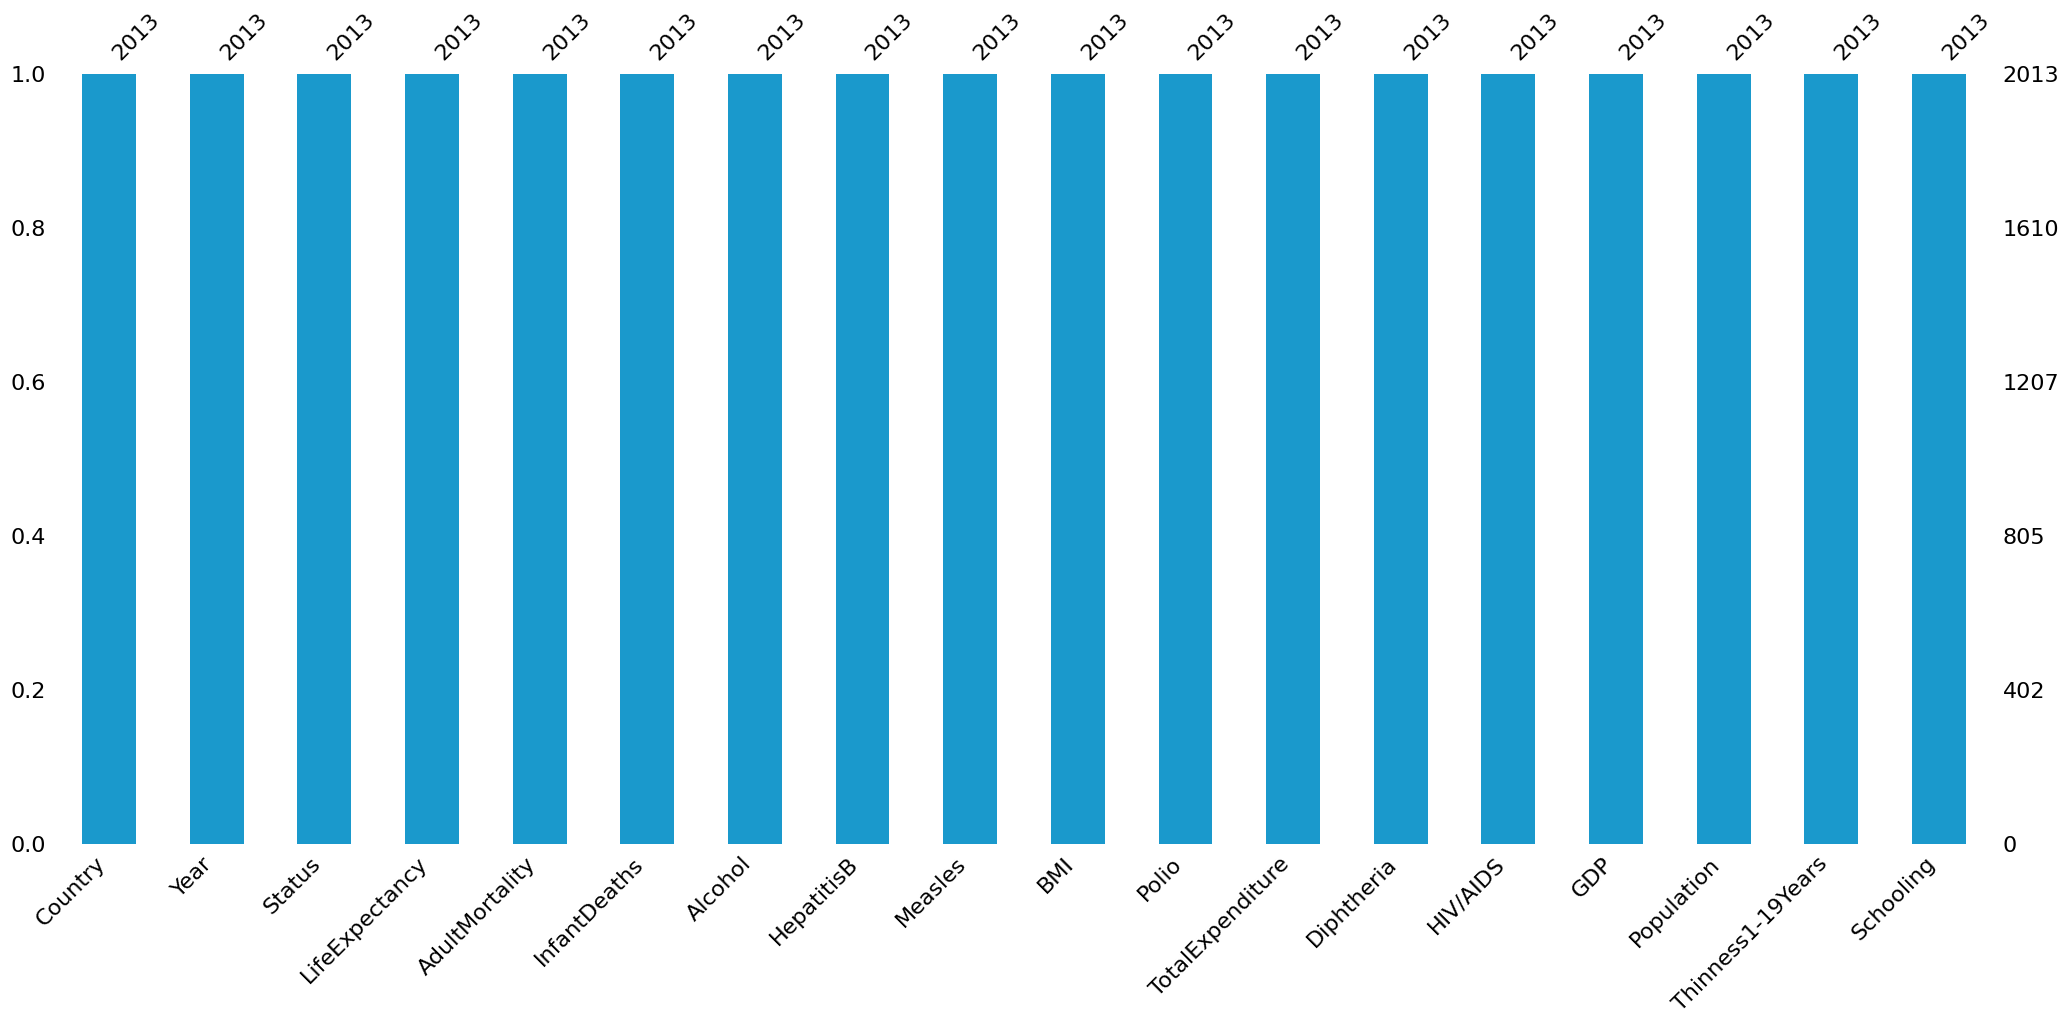

In [29]:
# train 데이터 나누어졌는지 시각화
msno.bar(train, color=(0.1, 0.6, 0.8))

<Axes: >

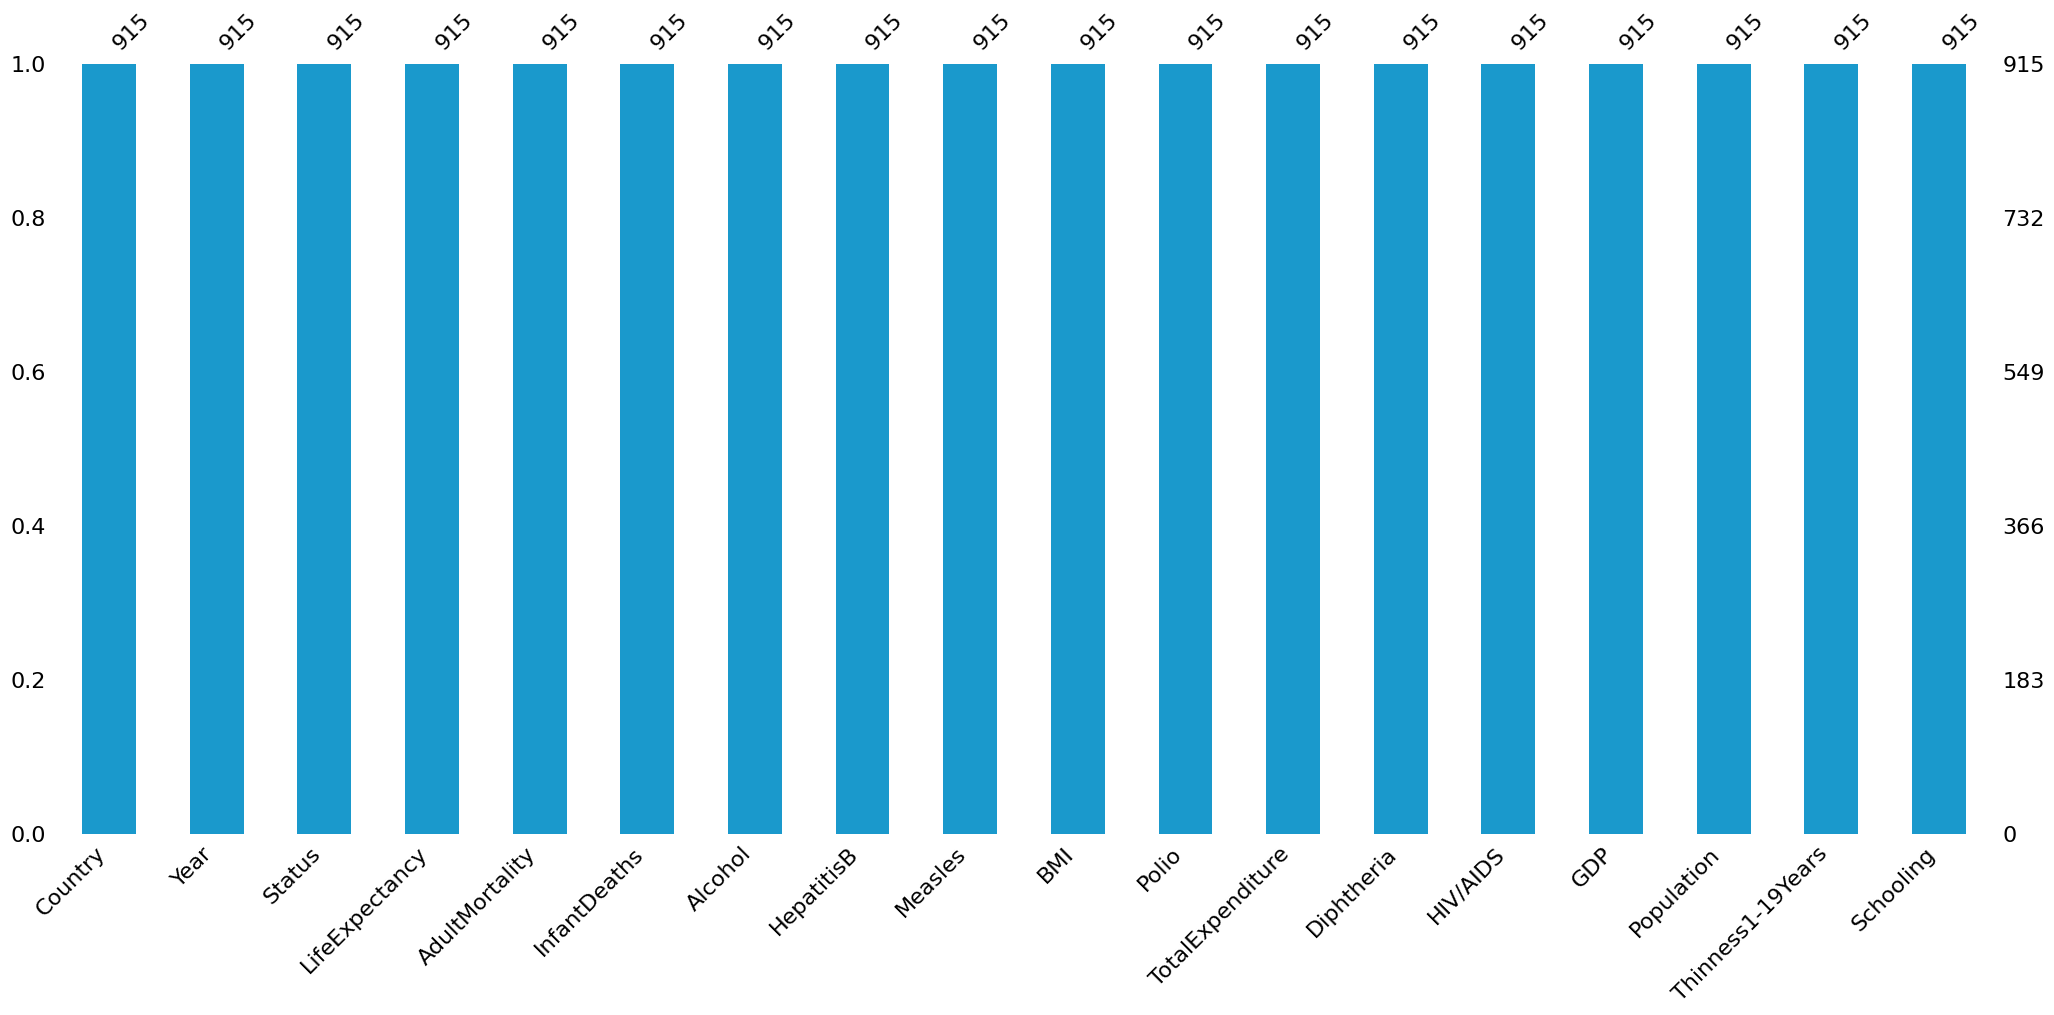

In [30]:
# test 데이터 분리 시각화 확인
msno.bar(test, color=(0.1, 0.6, 0.8))

In [31]:
# train, test 데이터를 X,y 분류
X_train= train.drop("LifeExpectancy",axis=1)
y_train= train['LifeExpectancy']
X_test= test.drop("LifeExpectancy",axis=1)
y_test= test['LifeExpectancy']

In [32]:
# 나눠졌는지 확인
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2013, 17), (915, 17), (2013,), (915,))

## 5.스케일링

In [33]:
df.columns

Index(['Country', 'Year', 'Status', 'LifeExpectancy', 'AdultMortality',
       'InfantDeaths', 'Alcohol', 'HepatitisB', 'Measles', 'BMI', 'Polio',
       'TotalExpenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'Thinness1-19Years', 'Schooling'],
      dtype='object')

In [34]:
# num_cols : 숫자형 데이터, cat_cols: 문자형 데이터
# 따로 스케일링
num_cols=['Year', 'AdultMortality',
       'InfantDeaths', 'Alcohol', 'HepatitisB', 'Measles', 'BMI', 'Polio',
       'TotalExpenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'Thinness1-19Years', 'Schooling']
cat_cols=['Country']

In [35]:
# 문자형 원핫인코딩
from sklearn.preprocessing import OneHotEncoder

oe = OneHotEncoder(sparse_output=False)
X_train_cat=oe.fit_transform(X_train[cat_cols])
X_test_cat = oe.fit_transform(X_test[cat_cols])
X_train_cat

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [36]:
# 숫자형 스탠다드 스케일링
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
X_train_num=ss.fit_transform(X_train[num_cols])
X_test_num = ss.fit_transform(X_test[num_cols])
X_train_num

array([[ 1.58113883,  0.82187744,  0.32141806, ..., -0.12673115,
         2.98210754, -0.72775786],
       [ 1.26491106,  0.83709866,  0.34476615, ..., -0.1733526 ,
         3.02647613, -0.81658187],
       [ 0.9486833 ,  0.8827623 ,  0.36811424, ..., -0.12948907,
         3.07084473, -0.87579788],
       ...,
       [-0.9486833 , -0.74590749, -0.05993412, ..., -0.17620148,
        -0.83359183, -0.49089383],
       [-1.26491106,  3.91939427, -0.05993412, ...,  0.04338775,
        -0.74485463, -0.55010983],
       [-1.58113883,  3.75957154, -0.06771681, ...,  0.04080603,
         1.34046944, -0.55010983]])

In [37]:
# 스케일링된 데이터 conatenate로 결합
X_train_s=np.concatenate((X_train_cat,X_train_num),axis=1)
X_test_s = np.concatenate((X_test_cat,X_test_num), axis=1)
X_train_s

array([[ 1.        ,  0.        ,  0.        , ..., -0.12673115,
         2.98210754, -0.72775786],
       [ 1.        ,  0.        ,  0.        , ..., -0.1733526 ,
         3.02647613, -0.81658187],
       [ 1.        ,  0.        ,  0.        , ..., -0.12948907,
         3.07084473, -0.87579788],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.17620148,
        -0.83359183, -0.49089383],
       [ 0.        ,  0.        ,  0.        , ...,  0.04338775,
        -0.74485463, -0.55010983],
       [ 0.        ,  0.        ,  0.        , ...,  0.04080603,
         1.34046944, -0.55010983]])

In [38]:
# 결합됐는지 체크
pd.DataFrame(X_train_s).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Columns: 198 entries, 0 to 197
dtypes: float64(198)
memory usage: 3.0 MB


In [39]:
# 결합됐는지 체크
pd.DataFrame(X_test_s).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Columns: 198 entries, 0 to 197
dtypes: float64(198)
memory usage: 1.4 MB


In [40]:
# np.array로 변환
y_train=y_train.values
y_test=y_test.values

In [41]:
# 갯수체크
pd.DataFrame(y_train).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2013 non-null   float64
dtypes: float64(1)
memory usage: 15.9 KB


In [42]:
# np.array 변환 체크
type(X_train_s),type(y_train)

(numpy.ndarray, numpy.ndarray)

## 6.학습

- LinearRegression
-RandomForestRegressor
-SVR


##### LinearRegression

In [43]:
# 선형회귀 알고리즘을 이용하여 모델 성능 테스트

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr_model = lr.fit(X_train_s,y_train)

In [44]:
w = lr_model.coef_ # 가중치
b = lr_model.intercept_ # 절편
print(f'w = {w}, b = {b}')

w = [-3.59362309e+11 -3.59362309e+11 -3.59362309e+11 -3.59362309e+11
 -3.59362309e+11 -3.59362309e+11 -3.59362309e+11 -3.59362309e+11
 -3.59362309e+11 -3.59362309e+11 -3.59362309e+11 -3.59362309e+11
 -3.59362309e+11 -3.59362309e+11 -3.59362309e+11 -3.59362309e+11
 -3.59362309e+11 -3.59362309e+11 -3.59362309e+11 -3.59362309e+11
 -3.59362309e+11 -3.59362309e+11 -3.59362309e+11 -3.59362309e+11
 -3.59362309e+11 -3.59362309e+11 -3.59362309e+11 -3.59362309e+11
 -3.59362309e+11 -3.59362309e+11 -3.59362309e+11 -3.59362309e+11
 -3.59362309e+11 -3.59362309e+11 -3.59362309e+11 -3.59362309e+11
 -3.59362309e+11 -3.59362309e+11 -3.59362309e+11 -3.59362309e+11
 -3.59362309e+11 -3.59362309e+11 -3.59362309e+11 -3.59362309e+11
 -3.59362309e+11 -3.59362309e+11 -3.59362309e+11 -3.59362309e+11
 -3.59362309e+11 -3.59362309e+11 -3.59362309e+11 -3.59362309e+11
 -3.59362309e+11 -3.59362309e+11 -3.59362309e+11 -3.59362309e+11
 -3.59362309e+11 -3.59362309e+11 -3.59362309e+11 -3.59362309e+11
 -3.59362309e+11 -3.5

In [45]:
lr_pred = lr_model.predict(X_test_s)
lr_pred[:5]

array([58.53375244, 58.04534912, 57.38977051, 56.69244385, 56.05566406])

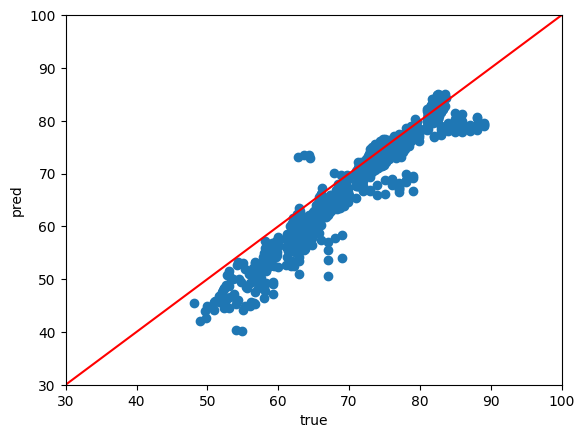

In [58]:
# LinearRegression
plt.scatter(y_test, lr_pred)
plt.xlabel('true')
plt.ylabel('pred')
plt.xlim(30,100)
plt.ylim(30,100)
plt.plot([30, 100], [30, 100], color='red')
plt.show()

In [47]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

lr_mse = mean_squared_error(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)

print('MSE:', lr_mse)
print('RMSE:', np.sqrt(lr_mse))
print('MAE:', lr_mae)

MSE: 17.166339200180246
RMSE: 4.143228113461802
MAE: 3.1154485917221653


#### RandomForestRegressor

In [48]:
# 랜덤포레스트회귀 모델을 이용하여 학습
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr_model = rfr.fit(X_train_s, y_train)


In [49]:
# 예측값이랑 실제값 비교를 위해 예측
rfr_pred = rfr_model.predict(X_test_s)

In [55]:
rfr_mse = mean_squared_error(y_test, rfr_pred)
rfr_mae = mean_absolute_error(y_test, rfr_pred)

print('MSE:', rfr_mse)
print('RMSE:', np.sqrt(rfr_mse))
print('MAE:', rfr_mae)

MSE: 12.029611975956282
RMSE: 3.4683731021844064
MAE: 2.694430601092896


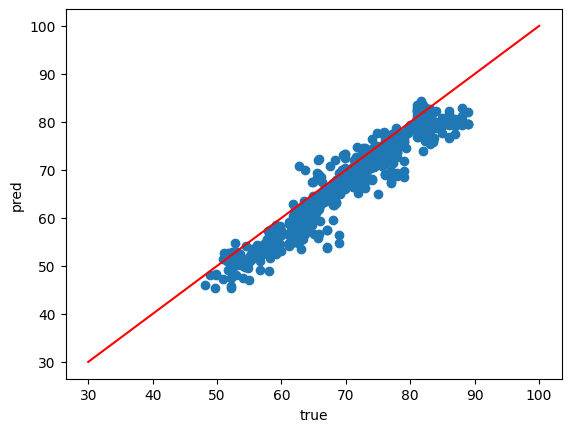

In [57]:
# RandomForestRegressor
plt.scatter(y_test, rfr_pred)
plt.xlabel('true')
plt.ylabel('pred')
plt.plot([30, 100], [30, 100], color='red')
plt.show()

#### SVR

In [51]:
from sklearn.svm import SVR

svr = SVR()
svr_model= svr.fit(X_train_s, y_train)
svr_preds = svr_model.predict(X_test_s)

In [56]:
svr_mse = mean_squared_error(y_test, svr_preds)
svr_mae = mean_absolute_error(y_test, svr_preds)

print('MSE:', svr_mse)
print('RMSE:', np.sqrt(svr_mse))
print('MAE:', svr_mae)


MSE: 17.928540267466605
RMSE: 4.2342107018270365
MAE: 3.288376963017697


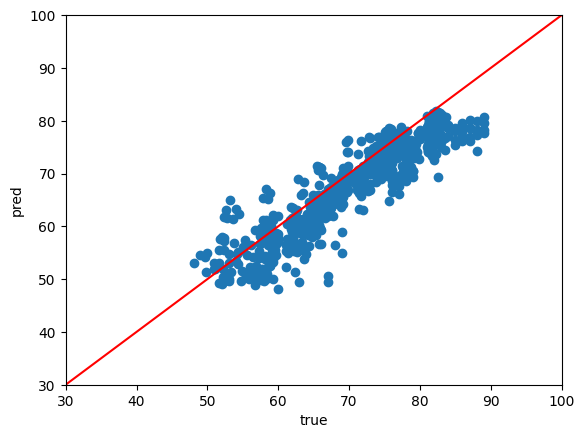

In [53]:
# SVR
plt.scatter(y_test, svr_preds)
plt.xlabel('true')
plt.ylabel('pred')
plt.xlim(30, 100)
plt.ylim(30, 100)
plt.plot([30, 100], [30, 100], color='red')
plt.show()

# 발생했던 문제점들

## 1. 컬럼 이름의 오타 문제
- df[columns] 명령어를 실행하였지만, 실행되지 않고 키에러가 출력되는 상황이 발생함
- 이 문제의 원인은 각 컬럼마다 오타, 스페이스 바 공백을 처리하지 않아 발생한 문제였음을 확인함
- df.columns를 실행하여 공백을 체크한 후 원본 데이터 수정하여 해결함

## 2. 너무 많은 데이터로 인한 과적합 문제
- Year 컬럼을 기준으로 각국의 2000년부터 2012년까지를 train 데이터로 사용할 생각이었으나 <br> train 데이터 수가 너무 많아 과적합이 발생할 것을 우려함
- train 데이터를 줄이고 그만큼 test 데이터를 늘리도록 코드를 조정하여 문제를 해결함

## 3. 데이터가 너무 적은 Feature로 인한 문제
- 전처리 이후 정확한 학습이 되지 않음을 발견함
- 원핫인코딩 과정에서 변수들 (X_train_cat, X_test_cat) 의 Feature 갯수가 달라져 10개의 차이가 발생한 것을 확인함
- 원핫인코딩에 사용되는 Country, Status 컬럼을 value_counts() 로 확인해 본 결과 Country의 엘리멘트가 너무 작은 국가가 있음을 발견함 <br>(아마 각 나라별 WHO 참여 연도가 다르기 때문이라고 추정함)
- 해당되는 국가를 삭제함으로써 문제를 해결함

## 4. 과적합 해결 과정에서 컬럼 수가 많아 발생한 문제
- 데이터를 다시 분할하였으나 여전히 과적합 문제를 겪었음
- 컬럼수가 많아 과적합이 발생한다고 의심하였음
- 히트맵에 나오지 않은 컬럼중 연관성이 높다고 판단되는 컬럼을 제외한<br> 나머지 컬럼을 삭제하는 것으로 문제를 해결함 (Status 컬럼 삭제)

# END